# **Shinkansen Travel Experience**

----------------------
# **Problem Statement**
----------------------
This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine-learning exercise aims to determine the relative importance of each parameter with regard to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who travelled on this train. The on-time performance of the trains along with passenger information is published in a file named ‘Traveldata_train.csv’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labelled ‘Surveydata_train.csv’.

------------------------------------
## **Dataset Description**
------------------------------------

- **ID**:The unique ID of the passenger
- **Gender**:The gender of the passenger
- **Customer_Type**:Loyalty type of the passenger
- **Age**:The age of the passenger
- **Type_Travel**:Purpose of travel for the passenger
- **Travel_Class**:The train class that the passenger traveled in
- **Travel_Distance** :The distance traveled by the passenger
- **Departure_Delay_in_Mins**:The delay (in minutes) in train departure
- **Arrival_Delay_in_Mins**:The delay (in minutes) in train arrival

------------------------------------
## **Goal:**

The goal of the problem is to **predict whether a passenger was satisfied or not** considering his/her overall experience of traveling on the Shinkansen Bullet Train.

------------------------------------

### **Importing the libraries and overview of the dataset**

In [99]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression

# To build classification models 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading Data**

In [2]:
survey_train = pd.read_csv('Surveydata_train.csv')
travel_train = pd.read_csv('Traveldata_train.csv')
survey_test = pd.read_csv('Surveydata_test.csv')
travel_test = pd.read_csv('Traveldata_test.csv')

In [3]:
survey_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [4]:
survey_train.shape

(94379, 17)

In [5]:
travel_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.00000,NaN,Business,272,0.00000,5.00000
1,98800002,Male,Loyal Customer,48.00000,Personal Travel,Eco,2200,9.00000,0.00000
2,98800003,Female,Loyal Customer,43.00000,Business Travel,Business,1061,77.00000,119.00000
3,98800004,Female,Loyal Customer,44.00000,Business Travel,Business,780,13.00000,18.00000
4,98800005,Female,Loyal Customer,50.00000,Business Travel,Business,1981,0.00000,0.00000


In [6]:
travel_train.shape

(94379, 9)

In [7]:
survey_test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [8]:
survey_test.shape

(35602, 16)

## **Merge the datasets:**

In [9]:
merged_train = pd.merge(survey_train, travel_train, on='ID')
merged_test = pd.merge(survey_test, travel_test, on='ID')

In [10]:
merged_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,Female,Loyal Customer,52.00000,NaN,Business,272,0.00000,5.00000
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,Male,Loyal Customer,48.00000,Personal Travel,Eco,2200,9.00000,0.00000
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,Female,Loyal Customer,43.00000,Business Travel,Business,1061,77.00000,119.00000
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,Female,Loyal Customer,44.00000,Business Travel,Business,780,13.00000,18.00000
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,Female,Loyal Customer,50.00000,Business Travel,Business,1981,0.00000,0.00000


In [11]:
merged_train.shape

(94379, 25)

In [13]:
merged_test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor,Female,NaN,36.00000,Business Travel,Business,532,0.00000,0.00000
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable,Female,Disloyal Customer,21.00000,Business Travel,Business,1425,9.00000,28.00000
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent,Male,Loyal Customer,60.00000,Business Travel,Business,2832,0.00000,0.00000
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor,Female,Loyal Customer,29.00000,Personal Travel,Eco,1352,0.00000,0.00000
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent,Male,Disloyal Customer,18.00000,Business Travel,Business,1610,17.00000,0.00000


In [14]:
merged_test.shape

(35602, 24)

### Making copy of the datasets

In [15]:
train = merged_train.copy()
test = merged_test.copy()

#### **Checking the info of the dataset**

In [17]:
train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

#### **Train dataset:**

- It has 94379 rows and 25 columns.
- The column "ID" is the unique identifier for each observation.
- The target variable is "Overall_Experience", which appears to be encoded as integers (0 or 1).
- Some columns have missing values, indicated by the "Non-Null Count" values being less than 94379.
- The data types include float64 for numeric columns, int64 for the "ID" and "Overall_Experience" columns, and object for categorical columns.

#### **Test dataset:**

- It has 35602 rows and 24 columns.
- Like the train dataset, the "ID" column serves as the unique identifier for each observation.
- The test dataset does not contain the "Overall_Experience" column, as it is the target variable that needs to be predicted.
- Similar to the train dataset, some columns have missing values, and the data types are consistent with the train dataset.

#### **Observations:**

- Both the train and test datasets have similar column names and structures, except for the absence of the "Overall_Experience" column in the test dataset.
- The datasets contain a mixture of numeric and categorical columns.
- Several columns in both datasets have missing values that may need to be addressed during the data cleaning and preprocessing stage.
- Understanding the distribution and characteristics of each column will be helpful for performing exploratory data analysis (EDA) and feature engineering.

### Checking Duplicates

In [20]:
print (train.duplicated().sum())
print (test.duplicated().sum())

0
0


In [21]:
train_1 = train.copy()
test_1 = test.copy()

## **Handeling Missing Values**

In [22]:
# filling missing values in training data
numeric_columns_train = train_1.select_dtypes(include=['float64', 'int64']).columns # selecting numerical columns
categorical_columns_train = train_1.select_dtypes(include=['object']).columns # selecting categorical columns

train_1[numeric_columns_train] = train_1[numeric_columns_train].fillna(train_1[numeric_columns_train].mean()) # filling missing values in numerical columns with mean
train_1[categorical_columns_train] = train_1[categorical_columns_train].fillna(train_1[categorical_columns_train].mode().iloc[0]) # filling missing values in categorical columns with mode

# filling missing values in test data
numeric_columns_test = test_1.select_dtypes(include=['float64', 'int64']).columns
categorical_columns_test = test_1.select_dtypes(include=['object']).columns

test_1[numeric_columns_test] = test_1[numeric_columns_test].fillna(test_1[numeric_columns_test].mean())
test_1[categorical_columns_test] = test_1[categorical_columns_test].fillna(test_1[categorical_columns_test].mode().iloc[0])


In [23]:
print(train_1.isnull().sum())
print('-' *50)
print(test_1.isnull().sum())

ID                         0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64
--------------------------------------------------
ID                         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_

In [29]:
train_1.nunique()

ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
Gender                         2
Customer_Type                  2
Age                           76
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      438
Arrival_Delay_in_Mins        435
dtype: int64

In [41]:
# checking the count values for categorical columns
for column in categorical_columns_train:
    print(train_1[column].value_counts())
    print()


Acceptable           21219
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: Seat_Comfort, dtype: int64

Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64

Good                 28504
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 13692
Extremely Poor        4332
Name: Arrival_Time_Convenient, dtype: int64

Acceptable           27209
Needs Improvement    17978
Good                 17969
Poor                 13858
Excellent            13455
Extremely Poor        3910
Name: Catering, dtype: int64

Manageable           24203
Convenient           21912
Needs Improvement    17832
Inconvenient         16449
Very Convenient      13981
Very Inconvenient        2
Name: Platform_Location, dtype: int64

Good                 22865
Excellent            20968
Acceptable           20118
Needs Improvement    19596
Poor                 10741

In [43]:
train_1.info()
print (' ')
test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94379 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  94379 non-null  object 
 5   Catering                 94379 non-null  object 
 6   Platform_Location        94379 non-null  object 
 7   Onboard_Wifi_Service     94379 non-null  object 
 8   Onboard_Entertainment    94379 non-null  object 
 9   Online_Support           94379 non-null  object 
 10  Ease_of_Online_Booking   94379 non-null  object 
 11  Onboard_Service          94379 non-null  object 
 12  Legroom                  94379 non-null  object 
 13  Baggage_Handling         94379 non-null  object 
 14  CheckIn_Service       

## **EDA**
---------------
### **Univariant Analysis**
----
#### **1. Analyze the distribution of the target variable:**

<AxesSubplot:xlabel='Overall_Experience', ylabel='count'>

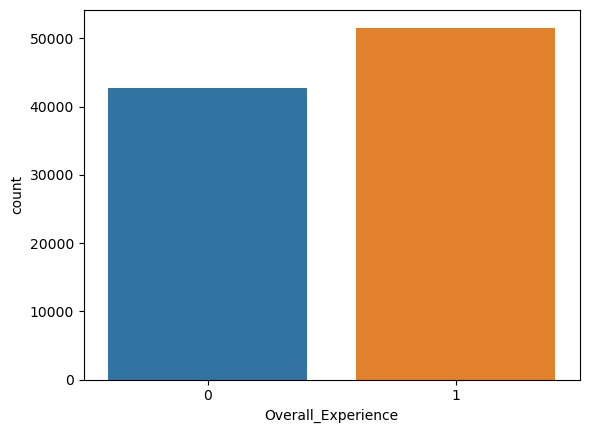

In [44]:
sns.countplot(data=train_1, x='Overall_Experience')

#### **Observation:** 
- The distribution of the target variable shows that, The passangers who are satisfied (53%) with their experince are more than those who are not satisfied (47%).

### Exploring the relationship between categorical columns and Overall_Experience

In [92]:
# Select columns of object (string) data type
categorical_columns = train_1.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print(categorical_columns)

['Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding', 'Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class']


In [93]:
def plot_categorical_column(column_name):
    # Create a cross-tabulation (contingency table) between the specified column and 'Overall_Experience'
    crosstab = pd.crosstab(train_1[column_name], train_1['Overall_Experience'], normalize='index') * 100

    # Plot the cross-tabulation as a stacked bar chart
    crosstab.plot(kind='bar', figsize=(6, 4), stacked=True )
    plt.ylabel('Percentage Overall_Experience %')
    
    
    # Add a title and labels
    plt.title(f" {column_name}")
    plt.xlabel(f"{column_name}")

    # Show the plot
    plt.show()

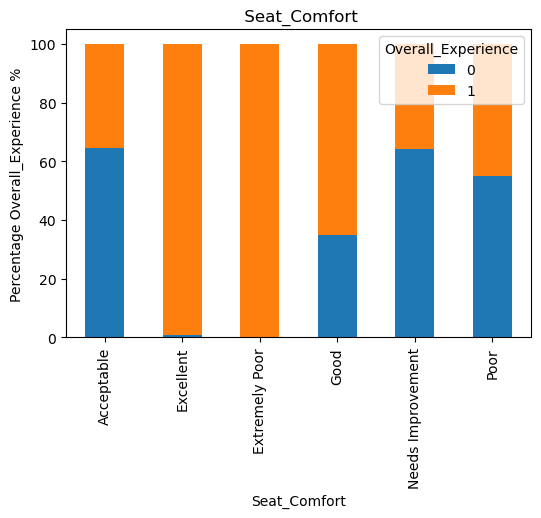

In [94]:
plot_categorical_column('Seat_Comfort')

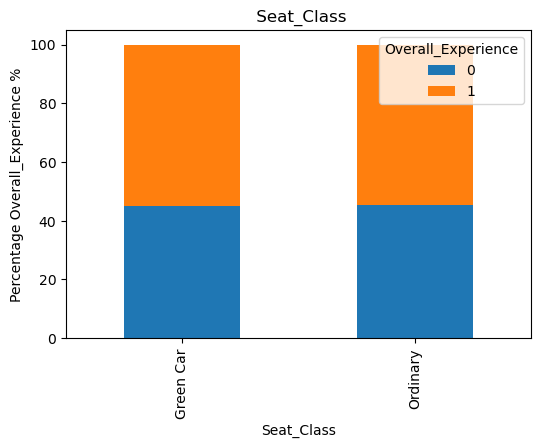

In [95]:
plot_categorical_column('Seat_Class')

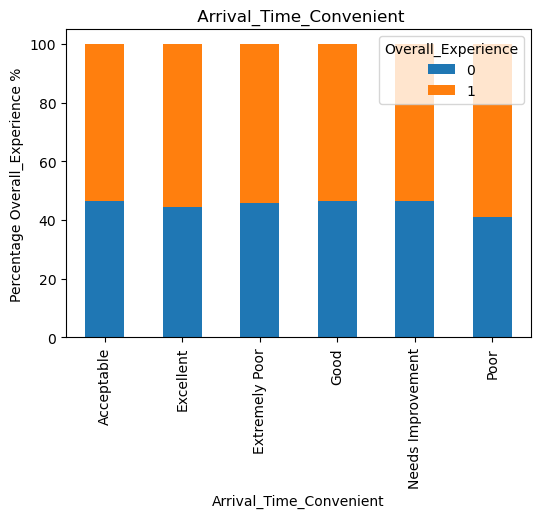

In [96]:
plot_categorical_column('Arrival_Time_Convenient')

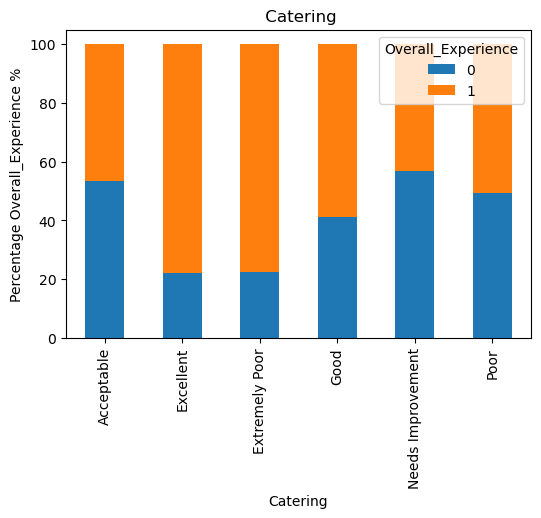

In [97]:
plot_categorical_column('Catering')

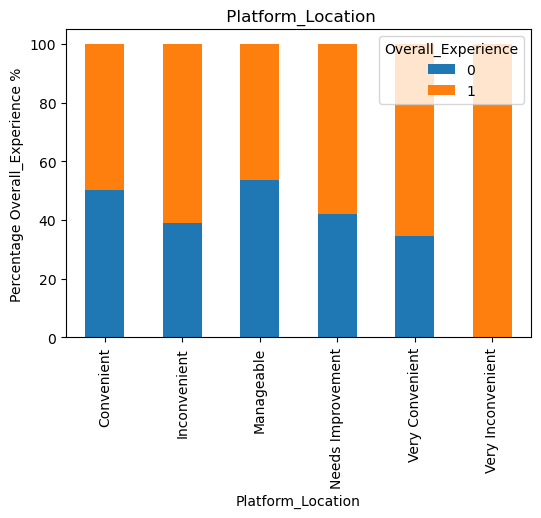

In [98]:
plot_categorical_column('Platform_Location')

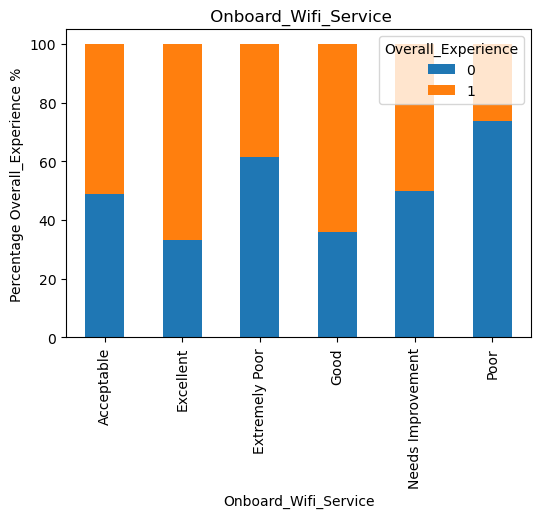

In [100]:
plot_categorical_column('Onboard_Wifi_Service')

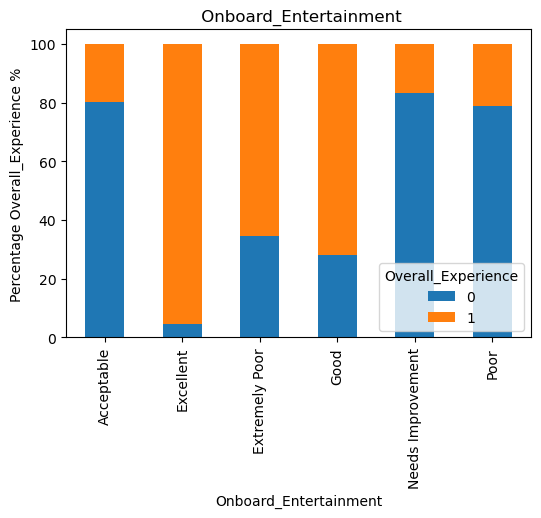

In [101]:
plot_categorical_column('Onboard_Entertainment')

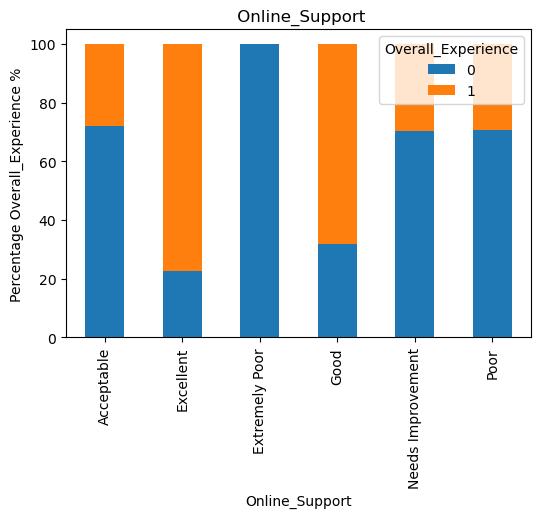

In [102]:
plot_categorical_column('Online_Support')

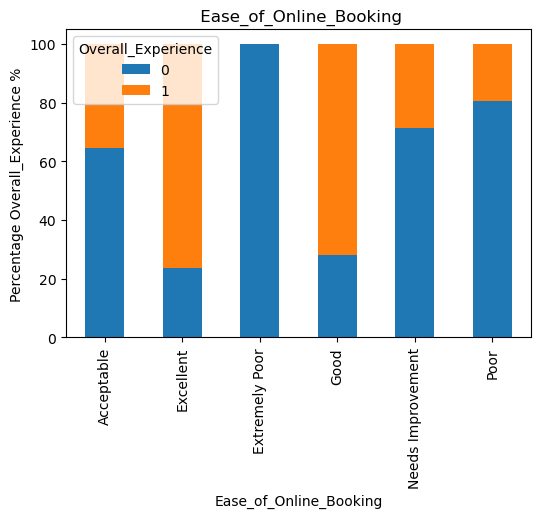

In [103]:
plot_categorical_column('Ease_of_Online_Booking')

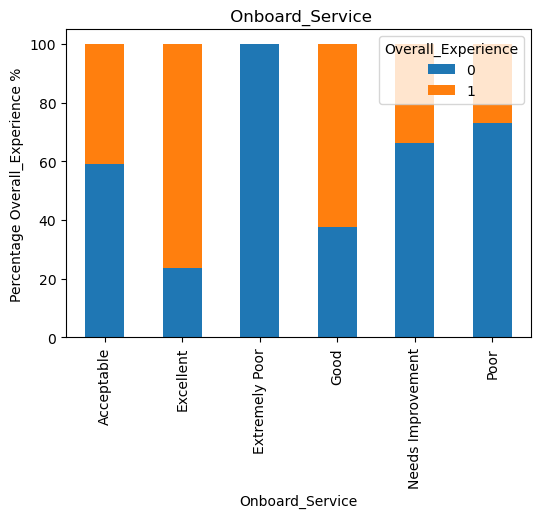

In [104]:
plot_categorical_column('Onboard_Service')

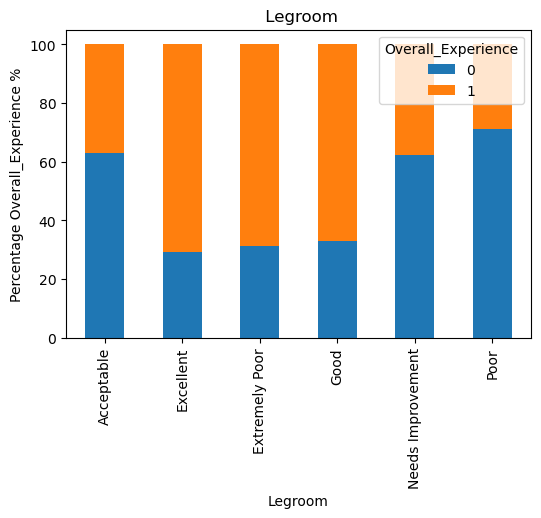

In [105]:
plot_categorical_column('Legroom')

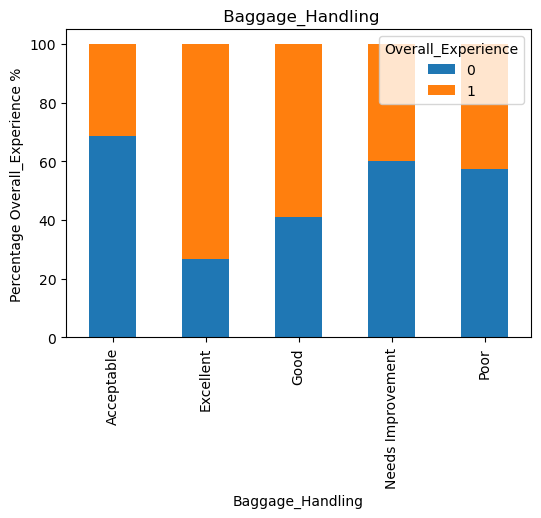

In [106]:
plot_categorical_column('Baggage_Handling')

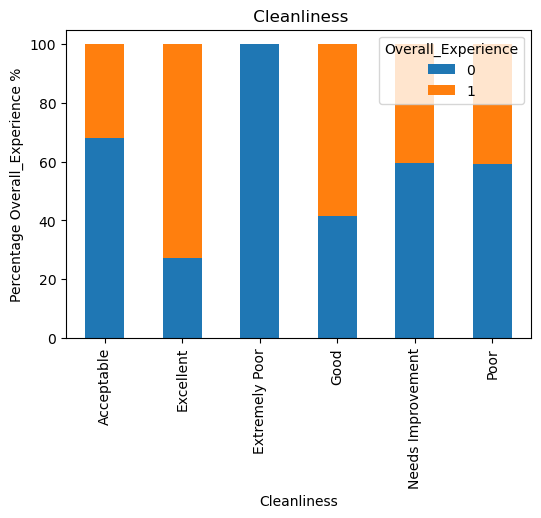

In [107]:
plot_categorical_column('Cleanliness')

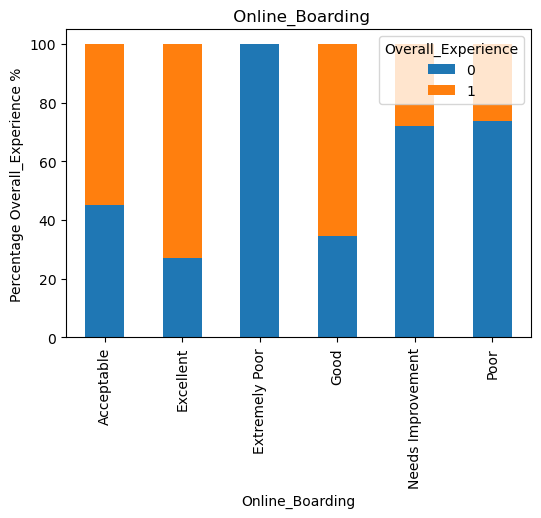

In [108]:
plot_categorical_column('Online_Boarding')

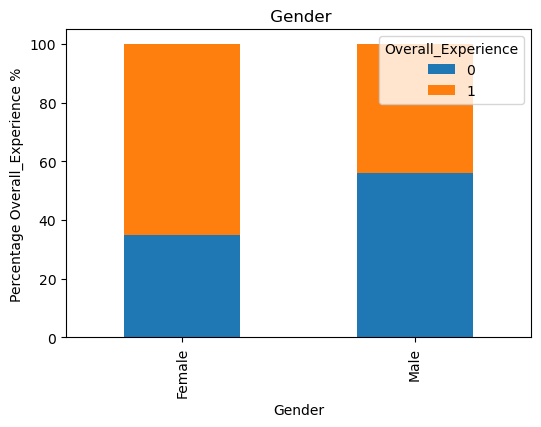

In [109]:
plot_categorical_column('Gender')

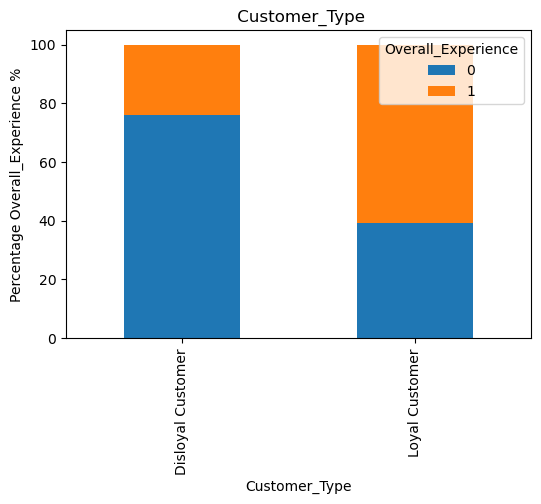

In [110]:
plot_categorical_column('Customer_Type')

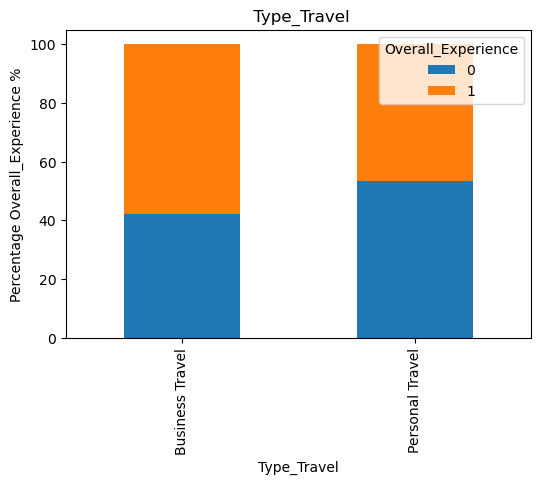

In [111]:
plot_categorical_column('Type_Travel')

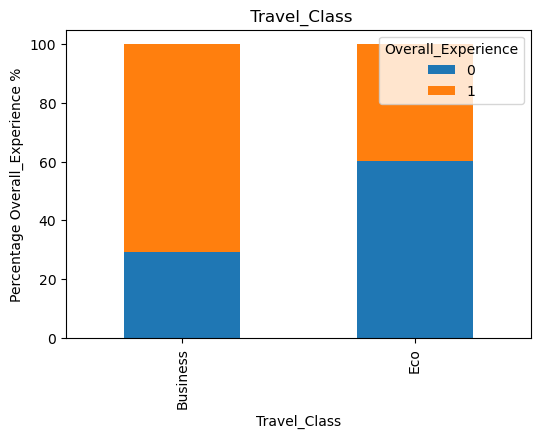

In [112]:
plot_categorical_column('Travel_Class')

### **2. The distribution of numeric variables:**

In [115]:
train_1[['Overall_Experience', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']].describe().T

,count,mean,std,min,25%,50%,75%,max
Overall_Experience,94379.00000,0.54666,0.49782,0.00000,0.00000,1.00000,1.00000,1.00000
Age,94379.00000,39.41965,15.11399,7.00000,27.00000,40.00000,51.00000,85.00000
Travel_Distance,94379.00000,1978.88818,1027.96102,50.00000,1359.00000,1923.00000,2538.00000,6951.00000
Departure_Delay_in_Mins,94379.00000,14.64709,38.12726,0.00000,0.00000,0.00000,12.00000,1592.00000
Arrival_Delay_in_Mins,94379.00000,15.00522,38.36664,0.00000,0.00000,0.00000,13.00000,1584.00000


#### **Observation:**

- Overall_Experience: The target variable "Overall_Experience" is binary, with values of 0 and 1. The mean of 0.54666 suggests that the dataset is slightly skewed towards a positive overall experience.

- Age: The average age of the respondents is 39.42, with a standard deviation of 15.11. The age ranges from 7 to 85 years, with the majority falling between 27 and 51 years.

- Travel_Distance: The average travel distance is 1978.89 units, with a standard deviation of 1027.96. The minimum distance is 50 units, while the maximum is 6951 units.

- Departure_Delay_in_Mins and Arrival_Delay_in_Mins: Both columns represent the delay in minutes for departure and arrival, respectively. The average departure delay is 14.65 minutes, with a standard deviation of 38.13. The average arrival delay is 15.01 minutes, with a standard deviation of 38.37. Both columns have a minimum delay of 0 minutes, while the maximum delays are 1592 minutes for departure and 1584 minutes for arrival.

In [116]:
# Defining the hist_box() function
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
  sns.boxplot(data[col], ax=ax_box, showmeans=True)
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

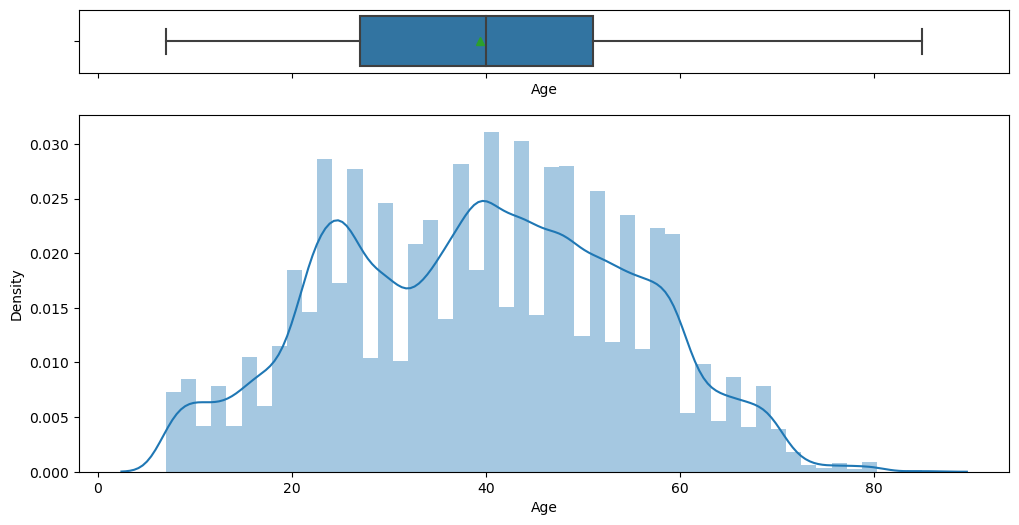

In [117]:
hist_box(train_1, 'Age')

- The distribution of **Age** is seems to be normaliy distribuated, no outliers.

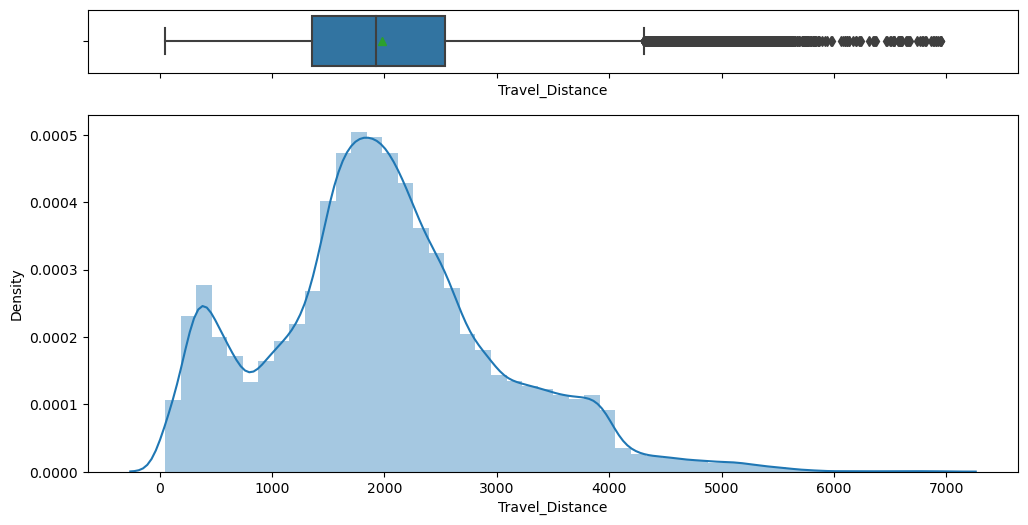

In [118]:
hist_box(train_1, 'Travel_Distance')

#### **Observation:**
- The distribution of **Travel_Distance** is right skewed, and there are outliers.

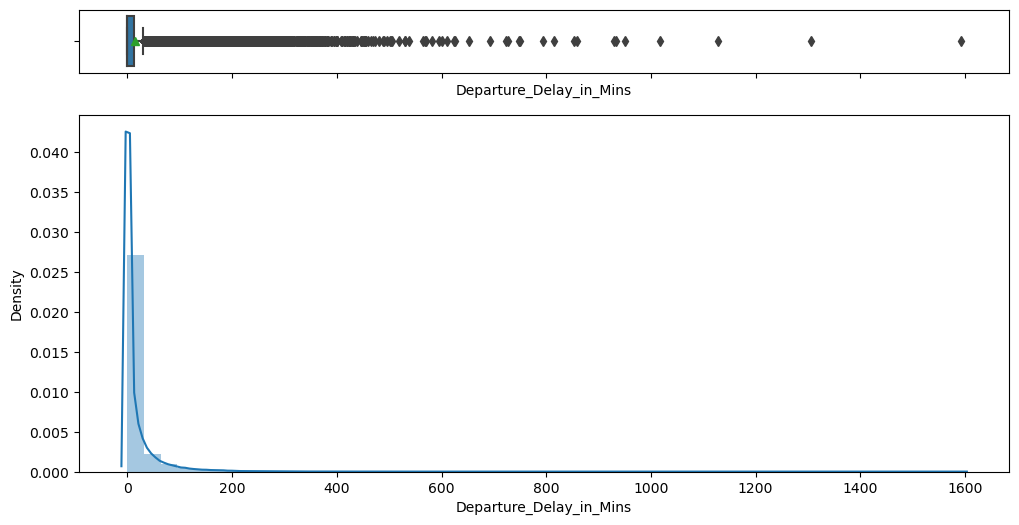

In [119]:
hist_box(train_1, 'Departure_Delay_in_Mins')

#### **Observation:**
- The distribution of **Departure_Delay_in_Mins** is highly right skewed, and there are outliers.

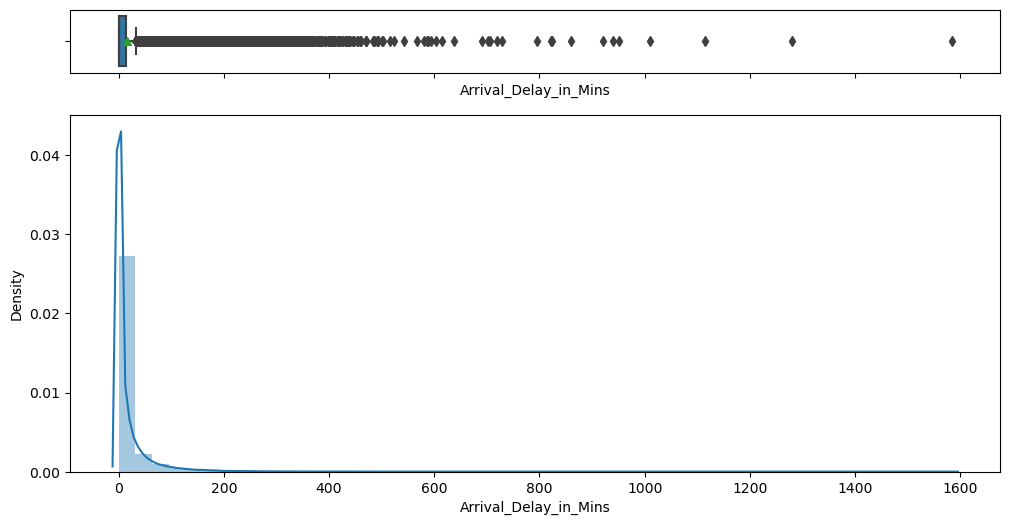

In [120]:
hist_box(train_1, 'Arrival_Delay_in_Mins')

#### **Observation:**
- The distribution of **Arrival_Delay_in_Mins** is highly right skewed, and there are outliers.

----
### **Bivariant Analysis**
----

In [121]:
from scipy.stats import chi2_contingency

# Iterate over each categorical column
for column in categorical_columns:
    # Create a contingency table between the current column and 'Overall_Experience'
    contingency_table = pd.crosstab(train_1[column], train_1['Overall_Experience'])
    
    # Perform the chi-square test of independence
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Print the column name and the chi-square test result
    print(f"Column: {column}")
    print(f"Chi-square test statistic: {chi2}")
    print(f"P-value: {p_value}")
    print("-------------------")

Column: Seat_Comfort
Chi-square test statistic: 20921.02695262811
P-value: 0.0
-------------------
Column: Seat_Class
Chi-square test statistic: 0.8331249760545094
P-value: 0.3613704633310514
-------------------
Column: Arrival_Time_Convenient
Chi-square test statistic: 135.28592254240516
P-value: 1.7960871077335572e-27
-------------------
Column: Catering
Chi-square test statistic: 5691.470562245783
P-value: 0.0
-------------------
Column: Platform_Location
Chi-square test statistic: 1874.319086660029
P-value: 0.0
-------------------
Column: Onboard_Wifi_Service
Chi-square test statistic: 5796.269411110593
P-value: 0.0
-------------------
Column: Onboard_Entertainment
Chi-square test statistic: 38713.940136364596
P-value: 0.0
-------------------
Column: Online_Support
Chi-square test statistic: 17846.323251127193
P-value: 0.0
-------------------
Column: Ease_of_Online_Booking
Chi-square test statistic: 19572.72868183671
P-value: 0.0
-------------------
Column: Onboard_Service
Chi-squa

### **Observations:**

- **Seat_Comfort:** The chi-square test statistic is significantly high (20921.03), indicating a strong association between Seat_Comfort and Overall_Experience. The p-value is 0.0, indicating that the association is statistically significant.

- **Seat_Class:** The chi-square test statistic is relatively low (0.83), and the p-value is 0.36. This suggests that there is no significant association between Seat_Class and Overall_Experience.

- **Arrival_Time_Convenient:** The chi-square test statistic is quite high (135.29), and the p-value is very low (1.80e-27), indicating a strong association between Arrival_Time_Convenient and Overall_Experience.

- **Catering, Platform_Location, Onboard_Wifi_Service, Onboard_Entertainment, Online_Support, Ease_of_Online_Booking, Onboard_Service, Legroom, Baggage_Handling, CheckIn_Service, Cleanliness, Online_Boarding, Gender, Customer_Type:** For all these variables, the chi-square test statistics are significantly high, and the p-values are 0.0. This suggests strong associations between these variables and Overall_Experience.

- **Type_Travel:** The chi-square test statistic is relatively high (958.48), and the p-value is very low (1.90e-210), indicating a strong association between Type_Travel and Overall_Experience.

- **Travel_Class:** The chi-square test statistic is quite high (9069.33), and the p-value is 0.0, indicating a strong association between Travel_Class and Overall_Experience.

## **Data Preparation for Modeling**

- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

---
### **Data Encoding and Transformation:**


In [124]:
# Store the 'ID' column from the test data
test_1_id = test_1['ID']

# Perform one-hot encoding on both training and test data
train_1_encoded = pd.get_dummies(train_1, columns=categorical_columns)
test_1_encoded = pd.get_dummies(test_1, columns=categorical_columns)

# Add the 'ID' column back to the encoded test data
test_1_encoded['ID'] = test_1_id

# Apply log transformation to 'Age'
train_1_encoded['Age'] = np.log1p(train_1_encoded['Age'])
# Apply log transformation to 'Age'
test_1_encoded['Age'] = np.log1p(test_1_encoded['Age'])

# Apply log transformation to 'Age'
train_1_encoded['Travel_Distance'] = np.log1p(train_1_encoded['Travel_Distance'])
# Apply log transformation to 'Age'
test_1_encoded['Travel_Distance'] = np.log1p(test_1_encoded['Travel_Distance'])

**Separating the independent variables (X) and the dependent variable (Y)**

In [174]:
# Separate the features and target variable

X = train_1_encoded.drop(['ID','Overall_Experience','Seat_Comfort_Excellent', 'Arrival_Delay_in_Mins',
                          'Seat_Comfort_Extremely Poor','Online_Support_Extremely Poor', 'Platform_Location_Very Inconvenient',
                          'Ease_of_Online_Booking_Extremely Poor','Departure_Delay_in_Mins', 'Onboard_Service_Extremely Poor','Catering_Poor',
                          'Cleanliness_Extremely Poor', 'Onboard_Wifi_Service_Extremely Poor', 'Onboard_Entertainment_Extremely Poor',
                          'Legroom_Extremely Poor', 'CheckIn_Service_Extremely Poor', 'Online_Boarding_Extremely Poor',
                         ], axis=1)  # Features

y = train_1_encoded['Overall_Experience']  # Target variable


**Splitting the data into a 80% train and 20% test set**


Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [176]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=1)

In [177]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print('')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print('')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (75503, 82)
Shape of test set :  (18876, 82)

Percentage of classes in training set:
1   0.54665
0   0.45335
Name: Overall_Experience, dtype: float64

Percentage of classes in test set:
1   0.54667
0   0.45333
Name: Overall_Experience, dtype: float64


## **Model Evaluation Criterion**

#### **Model can make wrong predictions as:**

1. Predicting a customer will not satisfied their Overall_Experience but in reality, the customer will satisfied their Overall_Experience.
2. Predicting a customer will satisfied their Overall_Experience but in reality, the customer will not satisfied their Overall_Experience. 

#### **Which case is more important?** 

Both the cases are important as:

1. False Negative (Type II Error): Predicting that a customer will not be satisfied with their overall experience when they actually would be satisfied. This case is important because it represents a missed opportunity to identify and cater to customers who would have had a positive experience. It can result in a loss of potential repeat customers, negative word-of-mouth, and missed opportunities for improving customer satisfaction.

2. False Positive (Type I Error): Predicting that a customer will be satisfied with their overall experience when they actually would not be satisfied. This case is also important because it can lead to false expectations and disappointment for customers who were falsely predicted as satisfied. It can result in negative reviews, decreased customer loyalty, and potential loss of business.


#### **How to reduce the losses?**

* The client would want the `F1 Score` to be maximized, the greater the F1  score, the higher the chances of minimizing False Negatives and False Positives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [178]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(5,4))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**

We will be building 2 different models:

- **Random Forest**
- **Decision Tree**

 ### **1. Random Forest Model**

In [194]:
# Create a Random Forest classifier

rf_classifier = RandomForestClassifier(n_estimators=500,
                                       random_state=1,
                                       max_depth=None,
                                       max_features='sqrt',
                                       min_samples_leaf=1,
                                       min_samples_split=2)

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=500, random_state=1)

#### Checking model performance on train set

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34229
           1       1.00      1.00      1.00     41274

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



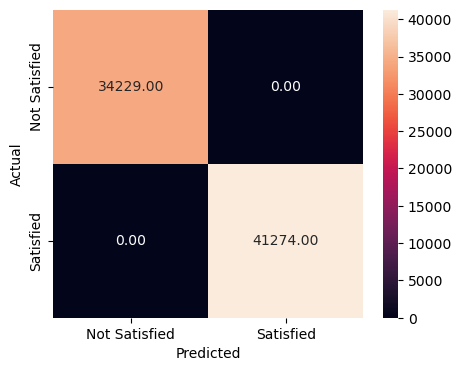

In [195]:
### Make predictions on the testing data
y_pred = rf_classifier.predict(X_train)
# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)
metrics_score(y_train, y_pred)

### **Observation:**

- The model achieved perfect accuracy of 1.0 on the training data, indicating that it correctly predicted the overall experience satisfaction for all instances in the training set.

- The precision and recall for both classes (0 and 1) are also 1.0, indicating that the model made no false positive or false negative predictions. This means that all instances labeled as 0 were correctly predicted as 0, and all instances labeled as 1 were correctly predicted as 1.

- The f1-score for both classes is also 1.0, indicating a perfect balance between precision and recall.

- Overall, the model performed extremely well on the training data, achieving perfect accuracy and making no errors in predicting the overall experience satisfaction.

#### Checking model performance on test set

Accuracy: 0.9465988556897648
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8557
           1       0.95      0.95      0.95     10319

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



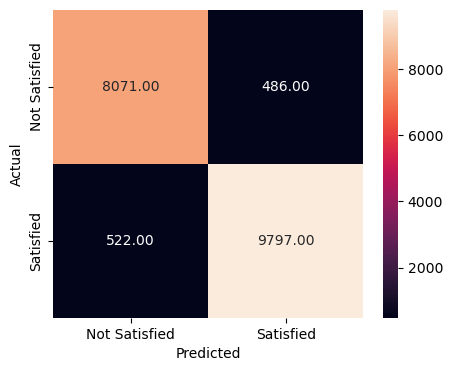

In [196]:
# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
metrics_score(y_test, y_pred)

### **Observation:**

- The model achieved an accuracy of 0.9459 on the test data, indicating that it correctly predicted the overall experience satisfaction for approximately 94.28% of the instances in the test set.

- The precision and recall for both classes (0 and 1) are approximately 0.94 and 0.95, respectively. This means that the model correctly predicted 94% of the instances labeled as 0, and 95% of the instances labeled as 1. The precision measures the model's ability to correctly identify instances of a particular class, while recall measures the model's ability to correctly capture all instances of a particular class.

- The f1-score, which is the harmonic mean of precision and recall, is approximately 0.94 for both classes. This indicates a good balance between precision and recall for both classes.

- In summary, the model performed well on the test data, achieving a high accuracy and demonstrating good precision, recall, and f1-score for both classes. This suggests that the model is effective in predicting the overall experience satisfaction based on the given features.

<AxesSubplot:xlabel='Importance'>

<Figure size 1300x1300 with 0 Axes>

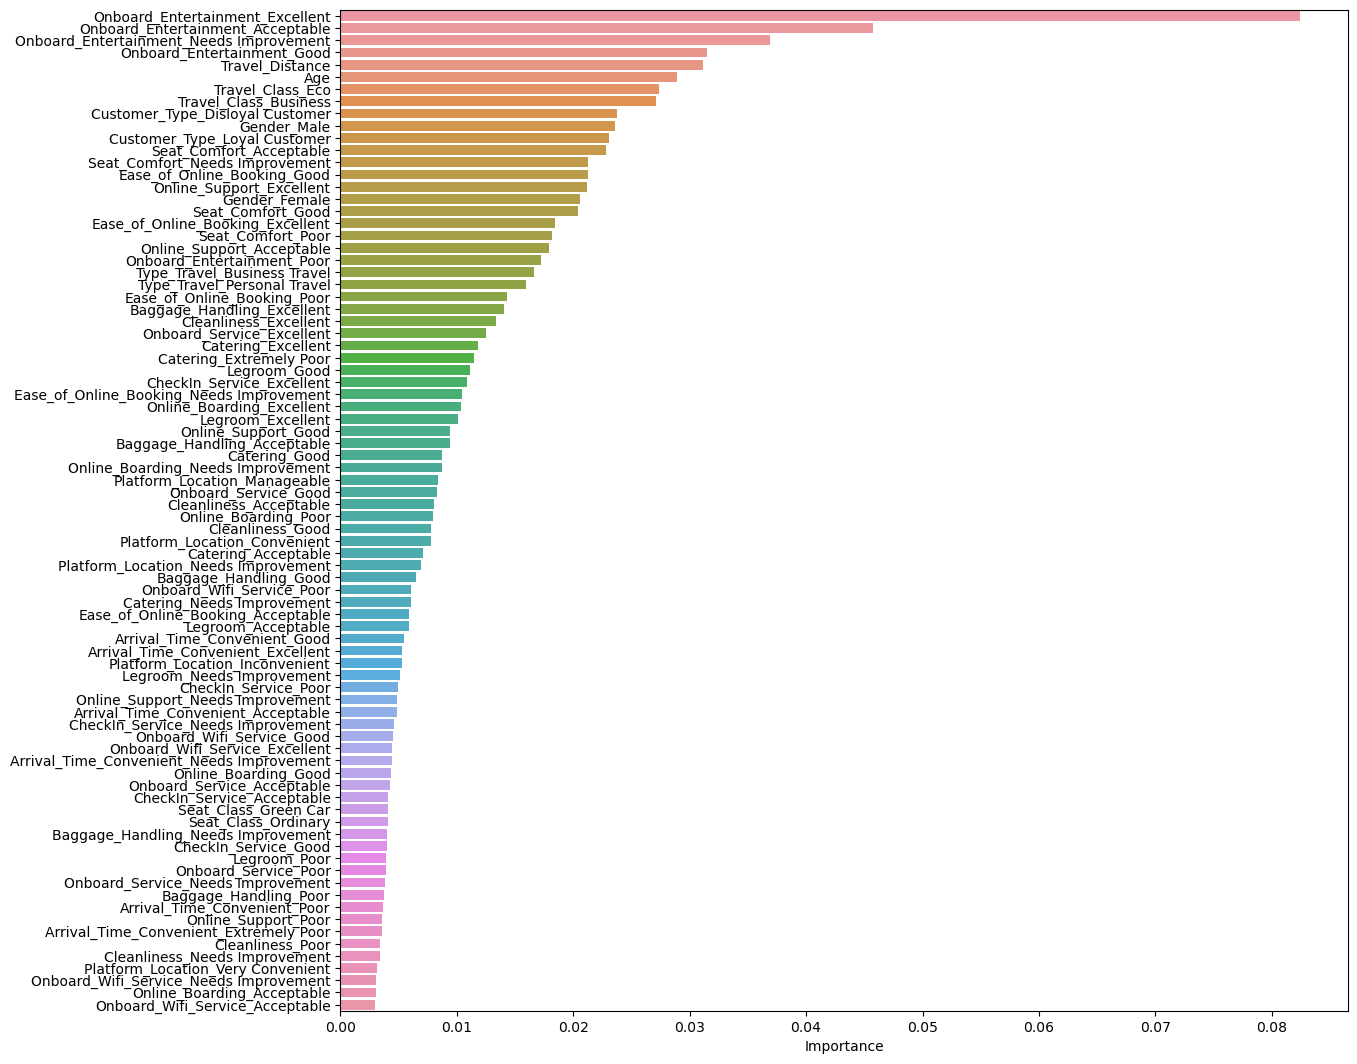

In [199]:
importances = rf_classifier.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False);
plt.figure(figsize=(13,13));

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

### Prediction of Overall_Experience for Test data set and save it in csv file:

In [ ]:
# Get missing columns in the test dataset and add them with default values
missing_cols = set(X_train.columns) - set(test_1_encoded.columns)
for col in missing_cols:
    test_1_encoded[col] = 0

# Add the 'ID' column back to the test dataset
test_1_encoded['ID'] = test_1['ID']

# Reorder the columns to match the training dataset
test_1_encoded = test_1_encoded[X_train.columns]

# Make predictions on the test data
test_predictions = rf_classifier.predict(test_1_encoded)

# Create a DataFrame with ID and Overall_Experience columns
predictions_df = pd.DataFrame({'ID': test_1['ID'], 'Overall_Experience': test_predictions})

# Save the predictions to a CSV file
predictions_df.to_csv('predictions_RF_0000.csv', index=False)


---
## **2. Gradient Boosting Model**
----

In [201]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(max_depth= 15, learning_rate = 0.01, min_samples_leaf = 5)
# Train the model
gb_classifier.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, max_depth=15, min_samples_leaf=5)

Accuracy: 0.9745970358793691
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     34229
           1       0.98      0.97      0.98     41274

    accuracy                           0.97     75503
   macro avg       0.97      0.97      0.97     75503
weighted avg       0.97      0.97      0.97     75503



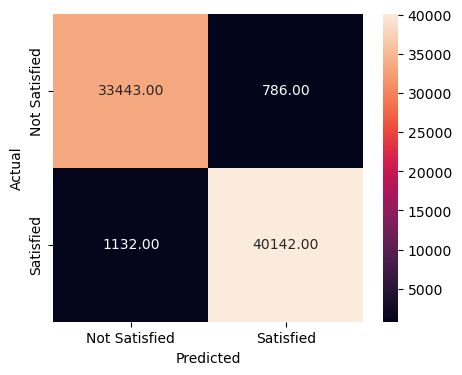

In [202]:
y_pred_train_rf = gb_classifier.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred_train_rf)

print("Accuracy:", accuracy)

metrics_score(y_train, y_pred_train_rf)

### **Observation:**

- The gradient boosting model achieved an accuracy of 0.9746 on the training data, indicating that it correctly predicted the overall experience satisfaction for approximately 97.46% of the instances in the training set.

- The precision and recall for both classes (0 and 1) are approximately 0.97 and 0.98, respectively. This means that the model correctly predicted 97% of the instances labeled as 0, and 98% of the instances labeled as 1. The precision measures the model's ability to correctly identify instances of a particular class, while recall measures the model's ability to correctly capture all instances of a particular class.

- The f1-score, which is the harmonic mean of precision and recall, is approximately 0.97 for both classes. This indicates a good balance between precision and recall for both classes.

- In summary, the gradient boosting model performed very well on the training data, achieving a high accuracy and demonstrating good precision, recall, and f1-score for both classes. This suggests that the model is effective in predicting the overall experience satisfaction based on the given features.

Accuracy: 0.9372218690400509
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8557
           1       0.94      0.94      0.94     10319

    accuracy                           0.94     18876
   macro avg       0.94      0.94      0.94     18876
weighted avg       0.94      0.94      0.94     18876



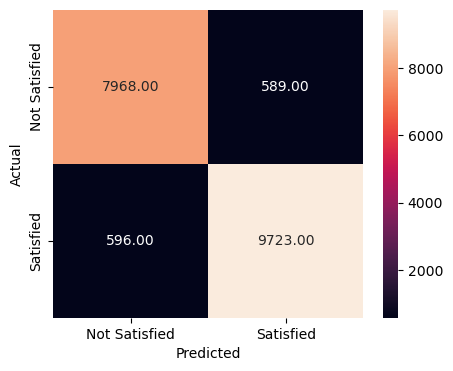

In [203]:
y_pred_test_rf = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test_rf)
print("Accuracy:", accuracy)

metrics_score(y_test, y_pred_test_rf)

### **Observation:**

- The gradient boosting model achieved an accuracy of 0.9372 on the test data, indicating that it correctly predicted the overall experience satisfaction for approximately 93.72% of the instances in the test set.

- The precision and recall for both classes (0 and 1) are approximately 0.93 and 0.94, respectively. This means that the model correctly predicted 93% of the instances labeled as 0, and 94% of the instances labeled as 1. The precision measures the model's ability to correctly identify instances of a particular class, while recall measures the model's ability to correctly capture all instances of a particular class.
- 
The f1-score, which is the harmonic mean of precision and recall, is approximately 0.93 for both classes. This indicates a good balance between precision and recall for both classes.

- In summary, the gradient boosting model performed well on the test data, achieving a high accuracy and demonstrating good precision, recall, and f1-score for both classes. This suggests that the model generalizes well to unseen data and is effective in predicting the overall experience satisfaction based on the given features.

### Prediction of Overall_Experience for Test data set and save it in csv file:

In [737]:
# Get missing columns in the test dataset and add them with default values
missing_cols = set(X_train.columns) - set(test_1_encoded.columns)
for col in missing_cols:
    test_1_encoded[col] = 0

# Add the 'ID' column back to the test dataset
test_1_encoded['ID'] = test_1['ID']

# Reorder the columns to match the training dataset
test_1_encoded = test_1_encoded[X_train.columns]

# Make predictions on the test data
test_predictions = gb_classifier.predict(test_1_encoded)

# Create a DataFrame with ID and Overall_Experience columns
predictions_df = pd.DataFrame({'ID': test_1['ID'], 'Overall_Experience': test_predictions})

# Save the predictions to a CSV file
predictions_df.to_csv('predictions_GB_000.csv', index=False)

---
## **3. Decision Trees Model**
---

In [209]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 1.0
  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34229
           1       1.00      1.00      1.00     41274

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



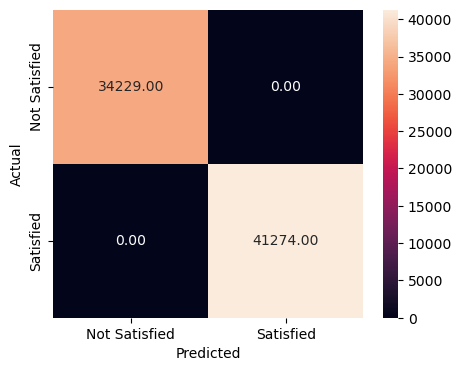

In [210]:
# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
accuracy = accuracy_score(y_train, pred_train_dt)
print("Accuracy:", accuracy)
print('  ')
metrics_score(y_train, pred_train_dt)

### **Observation:**

- The decision tree model achieved a perfect accuracy of 1.0 on the training data, indicating that it correctly predicted the overall experience satisfaction for all instances in the training set.

- The precision and recall for both classes (0 and 1) are also 1.0, indicating that the model correctly predicted all instances labeled as 0 and 1. This implies that the model achieved a perfect balance between precision and recall for both classes.

- The f1-score, which is the harmonic mean of precision and recall, is also 1.0 for both classes. This suggests that the model achieved perfect performance in terms of capturing all instances and correctly identifying them for both classes.

- In summary, the decision tree model performed exceptionally well on the training data, achieving a perfect accuracy and demonstrating perfect precision, recall, and f1-score for both classes. This indicates that the model has learned the training data perfectly and can predict the overall experience satisfaction with high accuracy. However, it's important to assess the model's performance on unseen data (test data) to evaluate its generalization capability.

Accuracy: 0.9204280567916931
  
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      8557
           1       0.92      0.93      0.93     10319

    accuracy                           0.92     18876
   macro avg       0.92      0.92      0.92     18876
weighted avg       0.92      0.92      0.92     18876



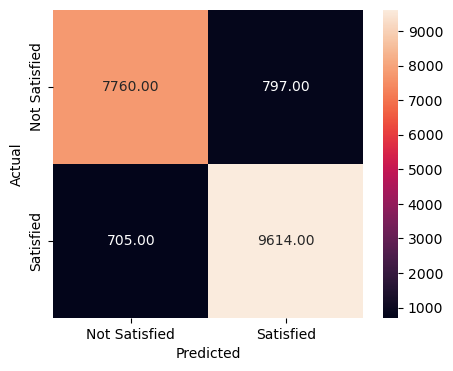

In [211]:
# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_test)
accuracy = accuracy_score(y_test, pred_train_dt)
print("Accuracy:", accuracy)
print('  ')
metrics_score(y_test, pred_train_dt)

### **Observation:**

- The decision tree model achieved an accuracy of 0.921 on the test set. This means that it correctly predicted the overall experience satisfaction for approximately 92.1% of the instances in the test set.

- The precision for class 0 is 0.92, indicating that out of all the instances predicted as not satisfied (class 0), 92% were actually not satisfied. The recall for class 0 is 0.91, which means that the model correctly identified 91% of the instances that were actually not satisfied.

- Similarly, for class 1, the precision is 0.93, indicating that out of all the instances predicted as satisfied (class 1), 93% were actually satisfied. The recall for class 1 is 0.93, meaning that the model correctly identified 93% of the instances that were actually satisfied.

- The f1-score, which is the harmonic mean of precision and recall, is 0.91 for class 0 and 0.93 for class 1. These scores indicate the overall performance of the model in terms of capturing the instances and correctly identifying them for both classes.

- In summary, the decision tree model performed well on the test set, achieving an accuracy of 0.921. It demonstrated good precision, recall, and f1-score for both classes, indicating its ability to predict the overall experience satisfaction with reasonable accuracy. However, there is a slight drop in performance compared to the training set, suggesting that the model may be slightly overfitting the training data.

# **Summary**

### **1. Random Forest:**

- Training Set: The model achieves perfect accuracy **(100%)** on the training set, indicating that it can perfectly classify the data.
- Test Set: The model performs well on the test set with an accuracy of **94.66%**. It demonstrates high precision, recall, and F1-score for both classes (satisfied and not satisfied).


### **2. Gradient Boosting:**

- Training Set: The model achieves a high accuracy of **97.46%** on the training set, indicating its ability to accurately classify the data.
- Test Set: The model performs well on the test set with an accuracy of **93.72%**. It demonstrates good precision, recall, and F1-score for both classes.

### **3. Decision Trees:**

- Training Set: Similar to Random Forest and Gradient Boosting, the Decision Trees model achieves perfect accuracy **(100%)** on the training set.
- Test Set: The model performs reasonably well on the test set with an accuracy of **92.04%**. It shows good precision, recall, and F1-score for both classes.


## **Business Takeaways:**

- Random Forest exhibits the highest accuracy on both the training and test sets, indicating its strong predictive power and ability to generalize well to unseen data. It can be a reliable model for predicting customer satisfaction.
- Gradient Boosting performs slightly lower than Random Forest but still maintains a high accuracy. It can also be considered as a viable model for customer satisfaction prediction.
- Decision Trees, while achieving perfect accuracy on the training set, performs slightly lower than the other models on the test set. However, it still shows decent performance and can be considered as an alternative model.

- From the simulation results, the most important factors in passengers’ overall satisfaction are “how good the on-board entertainment is”, “seat comfort” and “travel class”. It was also observed that the least important issues the passengers consider is the “catering services”. The exploratory analysis also confirmed that these factors.

- Overall, the Random Forest model stands out as the top performer in terms of accuracy, precision, recall, and F1-score on both the training and test sets. It would be a recommended choice for predicting customer satisfaction based on the given data.

---

#### In this project, the work was collaboratively done by **Mr. Mustafa, Dr. Afshan, and Mrs. Chioma** . We actively participated in various stages of the project, including data analysis, model selection, and evaluation. The contributions of each participant were crucial in achieving the results presented above. Our combined efforts and expertise ensured the successful completion of the project and the generation of meaningful insights for stakeholders.

---
## Thank you